In [284]:
%pip install praw
%pip install scikit-learn

In [285]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import praw

In [286]:
# Define URL
# url_democrats = "https://www.reddit.com/r/Democrats/.json"
# url_republicans = "https://www.reddit.com/r/Republicans/.json"
# username = {"User-agent": 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}
subreddit_democrats = "democrats"
subreddit_republicans = "republicans"

# Define user agent
user_agent = "reddit_scraper_1.0"

# Create an instance of reddit class
reddit = praw.Reddit(#username="enter your username here",
                     #password="enter your password here",
                     client_id="NznyKzNtcNwrqs_iC4gP4w",
                     client_secret="G8SVKJX27CVrDRPtNtT4rS0eZ-qMjA",
                     user_agent=user_agent
                     )

In [287]:
def get_subreddit(subred, n_pulls, red):

    reddit = red

    # Create sub-reddit instance
    subreddit_name = subred
    subreddit = reddit.subreddit(subreddit_name)

    df = pd.DataFrame()  # creating dataframe for displaying scraped data

    # creating lists for storing scraped data
    titles = []
    ids = []
    text = []
    subr = []

    # looping over posts and scraping it
    for submission in subreddit.new(limit=n_pulls):
        titles.append(submission.title)
        ids.append(submission.id)
        text.append(submission.selftext)
        subr.append(subreddit_name)

    df['Title'] = titles
    df['Id'] = ids
    df['Post Text'] = text
    df['Subreddit'] = subr

    return df

In [288]:
get_republicans = get_subreddit(subreddit_republicans, n_pulls = 1000, red = reddit)
get_republicans.head()

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

,Title,Id,Post Text,Subreddit
0,Why oh Why is the Biden Administration Prevent...,1acsksq,,republicans
1,POLL: Democrats dominate among OnlyFans prosti...,1acqfcs,,republicans
2,2024 Presidential Election - Trump Has No Real...,1acp73v,Let’s be honest here. Donald Trump has no real...,republicans
3,"""Militarizing Texas Guard""- Texas Governor Gre...",1aclk6o,,republicans
4,Fmr. Federal prosecutor: Trump has no one to b...,1acit0o,,republicans


In [289]:
get_democrats = get_subreddit(subreddit_democrats, n_pulls = 1000, red = reddit)
get_democrats.head()

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

,Title,Id,Post Text,Subreddit
0,Penn Gillette,1acpq6t,"Whoaaa, my respect for him just returned. He m...",democrats
1,"Overdraft fees, late fees could be slashed as ...",1acohpp,Regulators are proposing instead three options...,democrats
2,Trump’s ‘achilles heel’? Haley’s refusal to dr...,1acodi0,,democrats
3,Utah lawmakers pass terrifying anti-transgende...,1ackloo,,democrats
4,"Ohio, Michigan Republicans in Released Audio: ...",1acinaj,,democrats


In [290]:
get_democrats.dropna(inplace=True)
get_republicans.dropna(inplace=True)

In [291]:
get_republicans.shape

(956, 4)

In [292]:
get_democrats.shape

(992, 4)

In [293]:
get_democrats['tags'] = get_democrats['Title'] + get_democrats['Post Text']
get_republicans['tags'] = get_republicans['Title'] + get_republicans['Post Text']

In [294]:
master_df = pd.merge(get_republicans, get_democrats, how= 'outer')

In [295]:
master_df.shape

(1948, 5)

In [296]:
#transforming the target into 1 for Democrats and 0 for Conservative
master_df['Subreddit'] = master_df['Subreddit'].map(lambda x : 1 if x == "democrats" else 0)

In [297]:
master_df.tail()

,Title,Id,Post Text,Subreddit,tags
1943,Trump called Iowa evangelicals ‘so-called Chri...,1823mmk,,1,Trump called Iowa evangelicals ‘so-called Chri...
1944,Proud of my pro-Palestinian peace President.,181wsrl,,1,Proud of my pro-Palestinian peace President.
1945,Billionaires are lining up to eagerly fund Tru...,181ntzy,,1,Billionaires are lining up to eagerly fund Tru...
1946,Yes People...Every..Vote..Counts!,181ks4j,,1,Yes People...Every..Vote..Counts!
1947,"Let's finish off this turkey, America!",181ilts,,1,"Let's finish off this turkey, America!"


In [298]:
### Export dataframe to use
master_df.to_csv('master_df.csv')

In [299]:
%pip install scikit-learn

In [300]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction import text, _stop_words

In [301]:
additional_stop_words = ['www', 'things', 'does', 'x200b', 'amp', 'want', 'watch',
                           'just', 'like', 'https', 'com', 'republican', 'republicans',
                           'libertarians', 'democrats', 'democrat', 'people', 'libertarian',
                           'says', 'say', 'did', 'this', 'conservative', 'conservatives' ]

new_stop_list = list(_stop_words.ENGLISH_STOP_WORDS.union(additional_stop_words))

In [302]:
def count_words(title_df,stop_list = []):

    # Count Vectorize
    cvec = CountVectorizer(stop_words = stop_list, max_features=25)

    # Transform the corpus
    X_text = cvec.fit_transform(title_df['tags'])

    # Converts text to array form
    X_text = pd.DataFrame(X_text.toarray(), columns= cvec.get_feature_names_out())

    # See word counts
    word_counts = X_text.sum().sort_values(0, ascending=False)

    return word_counts

In [303]:
count_words(get_democrats)

the         698
to          626
in          369
and         368
of          361
trump       307
for         271
biden       208
on          195
is          175
that        155
it          132
are         113
from         97
as           96
with         92
this         87
they         84
be           77
by           76
he           75
abortion     70
2024         70
new          69
about        69
dtype: int64

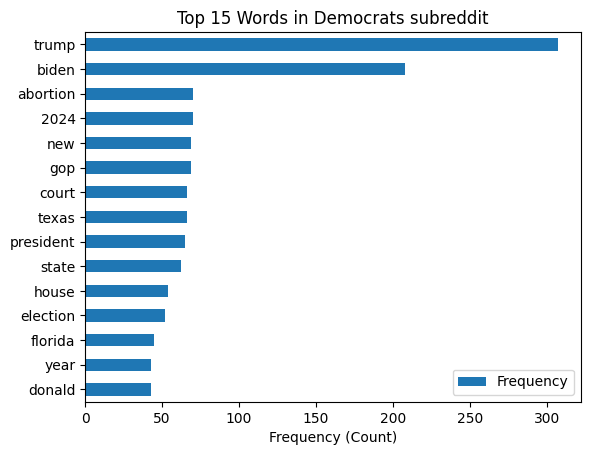

In [304]:
dems_wordcount = pd.DataFrame(count_words(get_democrats, new_stop_list), columns=["Frequency"])

# Visualization
politics_top15 = dems_wordcount.head(15)
politics_top15.sort_values('Frequency',ascending=True).plot(kind = "barh")
plt.title("Top 15 Words in Democrats subreddit")
plt.xlabel("Frequency (Count)")
plt.show()

In [305]:
count_words(get_republicans)

the          437
to           404
trump        347
in           330
of           236
for          176
and          171
biden        159
on           158
is           126
gop           99
that          91
with          89
from          85
he            84
his           72
it            70
new           70
after         69
just          65
watch         59
2024          59
as            55
you           55
president     54
dtype: int64

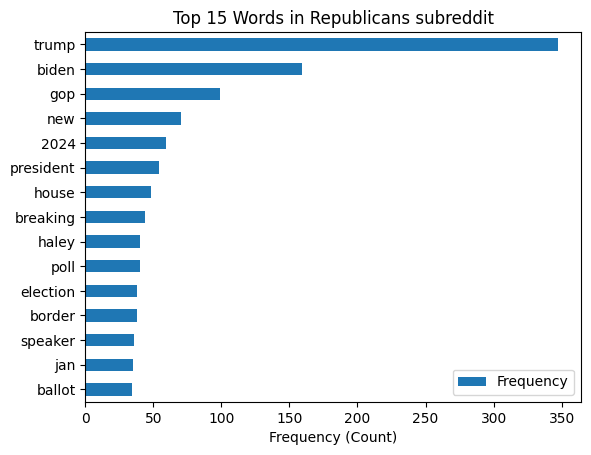

In [306]:
reps_wordcount = pd.DataFrame(count_words(get_republicans, new_stop_list), columns=["Frequency"])

# Visualization
politics_top15 = reps_wordcount.head(15)
politics_top15.sort_values('Frequency',ascending=True).plot(kind = "barh")
plt.title("Top 15 Words in Republicans subreddit")
plt.xlabel("Frequency (Count)")
plt.show()

In [307]:
master_df.head(35)

,Title,Id,Post Text,Subreddit,tags
0,Why oh Why is the Biden Administration Prevent...,1acsksq,,0,Why oh Why is the Biden Administration Prevent...
1,POLL: Democrats dominate among OnlyFans prosti...,1acqfcs,,0,POLL: Democrats dominate among OnlyFans prosti...
2,2024 Presidential Election - Trump Has No Real...,1acp73v,Let’s be honest here. Donald Trump has no real...,0,2024 Presidential Election - Trump Has No Real...
3,"""Militarizing Texas Guard""- Texas Governor Gre...",1aclk6o,,0,"""Militarizing Texas Guard""- Texas Governor Gre..."
4,Fmr. Federal prosecutor: Trump has no one to b...,1acit0o,,0,Fmr. Federal prosecutor: Trump has no one to b...
5,New York Republican Emerges As Betting Favorit...,1acfk8q,,0,New York Republican Emerges As Betting Favorit...
6,E. Jean Carroll lawyer: ‘She will collect’ $83...,1acf08x,,0,E. Jean Carroll lawyer: ‘She will collect’ $83...
7,Tim Pool about to be sued in New York for 83 t...,1acem43,,0,Tim Pool about to be sued in New York for 83 t...
8,Trump Ordered to Pay 83M to Nut Job -- Blind J...,1acb2xq,,0,Trump Ordered to Pay 83M to Nut Job -- Blind J...
9,Americans and Canadians are rallying to Texas ...,1ac91mz,Texas held its ground and was supported by tho...,0,Americans and Canadians are rallying to Texas ...


In [308]:
master_df.to_csv('master_df.csv', index=False)

In [309]:
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score, confusion_matrix, classification_report

In [310]:
master_df = pd.read_csv('master_df.csv')

In [311]:
# Features amd targets
X = master_df['tags']
y = master_df['Subreddit']

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify= y)

In [313]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1461,)
(1461,)
(487,)
(487,)


In [314]:
# Baseline Accuracy
y_test.value_counts(normalize=True)

1    0.50924
0    0.49076
Name: Subreddit, dtype: float64

In [344]:
cvec = CountVectorizer(stop_words= new_stop_list,
                       ngram_range=(1,2), min_df=2,
                       max_features=None, max_df = 0.4)

In [345]:
# Fit our CountVectorizer on the training data and transform training data.
X_train_cvec = pd.DataFrame(cvec.fit_transform(X_train).todense()
                           ,columns = cvec.get_feature_names_out())

# Fit our CountVectorizer on the test data and transform training data.
X_test_cvec = pd.DataFrame(cvec.transform(X_test).todense()
                           ,columns = cvec.get_feature_names_out())

In [346]:
#instantiate logisticregression
lr = LogisticRegression()
#fit data
lr = lr.fit(X_train_cvec, y_train)

In [347]:
#examine and verify shape
X_test_cvec.shape

(487, 3151)

In [348]:
y_test.shape


(487,)

In [349]:
#score our logistic regression model on our fitted training data
lr.score(X_train_cvec, y_train)

0.9657768651608487

In [350]:
#score our logistic regression model on our fitted testing data
lr.score(X_test_cvec, y_test)

0.6652977412731006

In [351]:
#generate predictions
pred = lr.predict(X_test_cvec)

#generate confusion matrix
conf = confusion_matrix( y_test,# True values.
                     pred)# Predicted values.
tn, fp, fn, tp = conf.ravel()

In [352]:
#convert confusion matrix to dataframe
conf_matr= pd.DataFrame(conf, index =  ['actual republican', 'actual democrats'], columns = ['predicted republican', 'predicted democrats'])

In [353]:
conf_matr

,predicted republican,predicted democrats
actual republican,138,101
actual democrats,62,186


In [361]:
import joblib

# Save the model and vectorizer to files
joblib.dump(lr, 'logistic_regression_model.pkl')
joblib.dump(cvec, 'count_vectorizer.pkl')

['count_vectorizer.pkl']